# Gaussian Mixture Models


An universally used generative unsupervised clustering is Gaussains Mixture Model (GMM) which is also known as "EM Clustering". The idea of GMM is very simple: for a given dataset, each point is generated by linear combination of multiple Gaussians.


## What is a Gaussian?

It is probability density function: It returns the probability oft that value occur


<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/450px-Empirical_Rule.PNG" width="350"/></center>

<center><img src="https://thecuriousastronomer.files.wordpress.com/2014/06/1000px-normal_distribution_pdf-svg.png" width="350"/></center>


<center><img src="http://i.imgur.com/iDNiL13.jpg" width="200"/></center>


The formula for a gaussian distribution - This is also called the probability density function. It's a function of a continuous random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval.

For *d dimension* the gaussian is defined as

<center>
$ N(x| \mu, \Sigma) = \frac{1}{2\pi^{d/2}\sqrt{\Sigma}} \exp{\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu)^T}$
</center>

Where:  

* $x = (x_1, x_2, ..., x_d)$,  
* $\mu = (\mu_1, \mu_2, ..., \mu_d)$ is the mean and,   
* $\Sigma$ is the covariance matrix  

Covariance is a measure of how changes in one variable are associated with changes in a second variable (**multicolinearity**). Specifically, covariance measures the degree to which two variables are linearly associated. 

PS: For more about covariance matrix http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/


Bellows is an exmaple of bi-dimensional covariance matrix.  

<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & cov(x_2,x_1) \\
 cov(x_1,x_2) &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

$cov(x,y)=\frac{\sum_{i=1}^{N}(x_{i})(y_{i})}{N-1}$

**Note assume the $x$ and $y$ are zero mean**

The geometric interpretation can be seen in the graph bellow. It is just rotation in the main axes and the gaussian contours look likes ellipsoides.


<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & cov \\
 cov &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

<center><img src="./images/covariance_full.png" width="300"/></center>

It is an option (it is simplification to work with only the diagonal elements of the covariance matrix), despite the correlation between the dimensions.


<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2(x_1) & 0.0 \\
 0.0 &  \sigma^2(x_2)
\end{bmatrix}
$
</center>

<center><img src="./images/covariance_diag.png" width="300"/></center>


<center>
$\boldsymbol\Sigma = \begin{bmatrix}
 \sigma^2 & 0.0 \\
 0.0 &  \sigma^2
\end{bmatrix}
$
</center>

<center><img src="./images/covariance_spherical.png" width="300"/></center>


### What are example of data you can model with a normal distribution?

<br>

- Physical quantities (height, weight, length, ...)  
- Test scores  
- Salary  
- Anything that is sum of many independent processes. This is the heart of the Central Limit Theorem (CLT).  


### Not Everything is Normal


<center><img src="images/abnormal.png" width="400"/></center>

Sometimes You Have 2 Gaussians

<center><img src="images/2_gaus.png" width="350"/></center>

Sometimes you need even more


## What is a Gaussian Mixture Model?

It's a probability distribution that consists of multiple probability distributions.

The probability given a mixture of gaussian is:

<center>
$P(x) = f(x|\theta) \equiv \sum_{j=1}^{K}{w_j N(x|\mu_j,\Sigma_j)}$
</center>

Where:  

* $K$ is the number of Gaussian in the mixture  
* $\theta = \{w_j,\mu_j,\Sigma_j\}$ for $j = 1,2,...,K$ are the parameter of the model  

<center><img src="images/gaussia_mixtures.png" width="500"/></center>

### Applications:

1. Unsupervised learn: Clusterize data
2. Visualization. Density plot in R
3. Bayesian classifier


### How to determine the parameters of the mixtures

How to determine the parameters $\theta$ that fits data from unkown distribtuion?  

Solution: Maximize the log likelihood of $P(X|\theta) = \prod_{i=1}^n f(x^{(i)}\mid\theta)$ using the EM (Expectation Maximization algorithm)

$
 \theta^* = arg\ MAX \{\hat\ell(\theta;X) \}
$


$
\hat\ell(\theta;X)=\frac1n \sum_{i=1}^n \ln f(x^{(i)}\mid\theta)
$


Where:  
* $n$ is the number of samples or points   
* $\hat\ell(\theta;X)$ is the log likelihood   
* $X = \{x^{(1)},x^{(2)},...,x^{(n)}\}$ are the d-dimensional points $x^{(i)} = (x^{(i)}_1,x^{(i)}_2, ..., x^{(i)}_d$)  

<center><img src="images/arg_max_log_like.png" width="400"/></center>

### Basic idea of the EM

An iterative method for finding maximum likelihood (MLE) or maximum a posteriori (MAP) estimates of parameters in statistical models,when the model depends on unobserved latent variables


#### Using 2 Gaussian and bi-dimensional data to explain

Two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. 

There are 5 paramaters: 4 of the them are Normal distributions and 1 more for the probability of choosing one of them.

Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.

The probability density function (PDF) is:

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  


1. Start with random gaussian with random parameters

<center><img src="images/init_gaussian.png" width="400"/></center>

2. Expectation 
    1. For each point determine of the probability of specific gaussian generate that data
    2. Assign the data for the gaussian with the hishest probability
    
<center><img src="images/em.png" width="400"/></center>

In **E-step** the data was splited in 2 subset:
1. $X^{<1>}$ all data points assigned to the first gaussian
2. $X^{<2>}$ all data points assigned to the second gaussian

    
3. Maximization
    1. For each gaussian update gaussian parameters by compute the parameters $\mu_j,\Sigma_j$ using the mean and covariance of the data assigned to that Gaussian
    2. $w_j$ is the number of data assigned to that Gaussian divide by the total number  
    

<center><img src="images/MAX.png" width="400"/></center>

* $\mu_1 = AVG(X^{<1>})$   
* $Var(X^{<1>})$  
* $ cov(X^{<1>}_1,X^{<2>}_2) $ 
* $w_1 = \frac{n_1}{n}$  where $n_1$ is the number of point in the first group .  

Repeat the same computation for the second Gaussian

<br>
<center><img src="http://people.revoledu.com/kardi/tutorial/EM/images/EM_algorithm.png" width="500"/></center>


## Simulation

Import Dependencies and test out a distribution graph


In [1]:
reset -fs

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("white")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [59]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=False, ax=None):
    ax = ax or plt.gca()
    
    if label:
        labels = label
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    ws = [value for g in guess for (param, value) in g.items() if param == 'w']
    w_factor = 0.2 /np.max(ws)
    for param in gmm:
        pos = param['mu']
        covar = param['Covar']
        w = param['w']
        print('pos:{}'.format(pos))
        print('covar: {}'.format(covar))
        print('w: {}'.format(w))

        draw_ellipse(pos, covar, alpha=w * w_factor)


,label,x,y
189,2,4.798811,-0.137559
130,2,4.524132,0.654177
151,2,9.734571,1.851064
44,1,-0.475372,3.544476
12,1,1.662117,3.705361


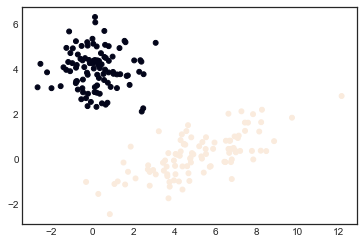

In [29]:
df = pd.read_csv("bi_dimensional_n_bi_modal_data.csv", index_col=False)
#show first 5 examples (in BTC)
df.sample(5).head(n=5)


fig = plt.figure()
plt.scatter(df['x'], df['y'], 24, c=df['label'])

### Initialization

pos:[-2.  5.]
covar: [[1. 0.]
 [0. 1.]]
w: 0.4
pos:[6. 3.]
covar: [[1. 0.]
 [0. 1.]]
w: 0.6


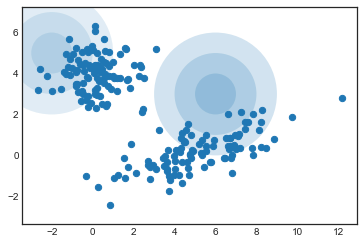

In [76]:
guess = [{ 'mu': np.asarray([-2.0,5.0]),
          'Covar': np.asarray([ [1.0, 0], [0, 1.0] ]),
          'w': 0.4 },  
          {'mu': np.asarray([6.0,3.0]),
          'Covar': np.asarray([ [1.0, 0], [0, 1.0] ]),
          'w': 0.6}]

labels = df.label
X = df[['x','y']].values

plot_gmm(guess, X)

In [103]:
param = guess[0]

mu = param['mu']
covar = param['Covar']
w = param['w']


covar_inv = np.linalg.inv(covar)

print('mu:{}'.format(mu))


print('covar: {}'.format(covar))

print('covar*covar_inv: {}'.format(np.matmul(covar, covar_inv)))

print('----')


d = mu.shape[0]
det_covar = np.linalg.det(covar)
print(det_covar)

norm_const = 1.0/np.sqrt(np.power(2*np.pi,d))/det_covar
print(norm_const)

x = [-2.0, 5.0]
print('x: {}'.format(x))

a = x - mu
a_times_covar_inv = np.matmul(a, covar_inv)

p =  norm_const* np.exp(-0.5* np.matmul(a_times_covar_inv,a.transpose()))

print(p)

z = norm_const*np.exp(0.0)
print('max prob: {}'.format(z))

mu:[-2.  5.]
covar: [[1. 0.]
 [0. 1.]]
covar*covar_inv: [[1. 0.]
 [0. 1.]]
----
1.0
0.15915494309189535
x: [-2.0, 5.0]
0.15915494309189535
max prob: 0.15915494309189535


In [ ]:
# probability that a point came from a Guassian with given parameters
def prob(x, mu, Covar, weight):
    p = weight
    
    for i in range(len(x)):
        p *= norm.pdf(x[i], mu[i], sig[i][i])
    return p


# assign every data point to its most likely cluster
def expectation(dataFrame, parameters):
    
    for i in range(dataFrame.shape[0]):

        x = dataFrame['x'][i]
        y = dataFrame['y'][i]
    
        print(list(parameters['mu1']))
        print(list(parameters['sig1']))
        p_cluster1 = prob([x, y], list(parameters['mu1']), list(parameters['sig1']), parameters['lambda'][0] )
        p_cluster2 = prob([x, y], list(parameters['mu2']), list(parameters['sig2']), parameters['lambda'][1] )

        if p_cluster1 > p_cluster2:
            dataFrame['label'][i] = 1
        else:
            dataFrame['label'][i] = 2
            
    return dataFrame

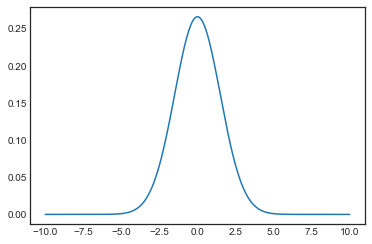

In [3]:
#Return evenly spaced numbers over a specified interval.
x = np.linspace(start=-10, stop=10, num=1000)
#A normal continuous random variable.
#The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
y = stats.norm.pdf(x, loc=0, scale=1.5) 
#plot it!
plt.plot(x, y)

In [4]:
#for data preprocessing
import pandas as pd

In [5]:
#read our dataset
df = pd.read_csv("bimodal_example.csv")
#show first 5 examples (in BTC)
df.head(n=5)

,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995


In [6]:
#show the distribution of the data as a histogram
data = df.x

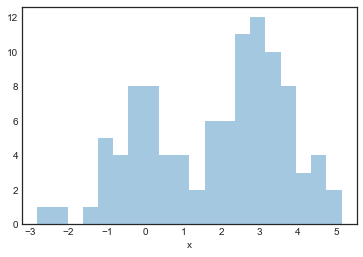

In [7]:
#plot histogram
sns.distplot(data, bins=20, kde=False)

Is the normal distribution a useful model for the data?

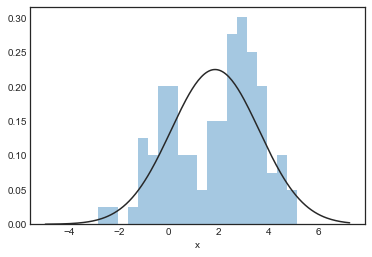

In [8]:
#try to fit a normal distribution to this data
sns.distplot(data, fit=stats.norm, bins=20, kde=False,)

Back to our data
-----



In [9]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, x):
        "Probability of a data point given the current parameters"
        u = (x - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    #printing model values
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [10]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('mean(data): {:.2}, std(data) = {:.2}'.format(np.mean(data), np.std(data)))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

mean(data): 1.9, std(data) = 1.8
Best single Gaussian: μ = 1.9, σ = 1.8


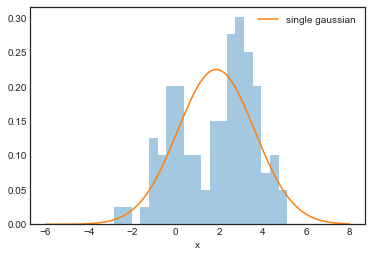

In [11]:
#fit a single gaussian curve to the data
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

In [12]:
from math import sqrt, log, exp, pi
from random import uniform

In [13]:
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        #init with multiple gaussians
        self.g1 = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.g2 = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        
        #as well as how much to mix them
        self.mix = mix

        # init loglike
        self.loglike = 0.0
    
    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for x in self.data:
            # unnormalized weights
            wp1 = self.g1.pdf(x) * self.mix
            wp2 = self.g2.pdf(x) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den
            # add into loglike
            self.loglike += log(wp1 + wp2)
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators

        (left, rigt) = zip(*weights)
        
        g1_den = sum(left)
        g2_den = sum(rigt)

        # compute new means
        self.g1.mu = sum(w * d / g1_den for (w, d) in zip(left, data))
        self.g2.mu = sum(w * d / g2_den for (w, d) in zip(rigt, data))

        # compute new sigmas
        self.g1.sigma = sqrt(sum(w * ((d - self.g1.mu) ** 2)
                                  for (w, d) in zip(left, data)) / g1_den)
        self.g2.sigma = sqrt(sum(w * ((d - self.g2.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / g2_den)
        # compute new mix
        self.mix = g1_den/len(data)

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep())
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike
 
    def pdf(self, x):
        return (self.mix)*self.g1.pdf(x) + (1-self.mix)*self.g2.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.g1, 
                                                              self.g2, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.g1, 
                                                        self.g2, 
                                                        self.mix)
    
 

In [14]:
# Check out the fitting process
n_iterations = 5
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass

 1 Mixture: Gaussian(-0.448441, 0.753139), Gaussian(2.81055, 1.04759), mix=0.291)
 1 Mixture: Gaussian(-0.365274, 0.804394), Gaussian(2.85384, 1.02446), mix=0.308)
 1 Mixture: Gaussian(-0.316239, 0.829807), Gaussian(2.89415, 0.989935), mix=0.321)
 1 Mixture: Gaussian(-0.279713, 0.847805), Gaussian(2.92668, 0.960029), mix=0.332)
 1 Mixture: Gaussian(-0.250519, 0.862936), Gaussian(2.95151, 0.937232), mix=0.34)


In [15]:
# Find best Mixture Gaussian model
n_iterations = 20
n_random_restarts = 500
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
print('\n\nDone. 🙂')

Computing best model with random restarts...



Done. 🙂


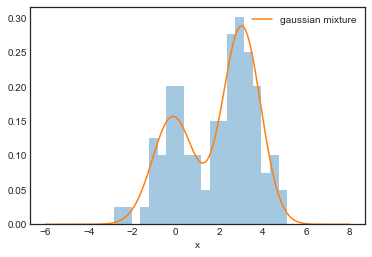

In [16]:
#mixture
sns.distplot(data, bins=20, kde=False, norm_hist=True)
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
plt.legend();

Summary
----

- Gaussian Mixture Models (GMM) take our old friend the Gaussian and add another Gaussian(s).
- This allows us to model more complex data.
- We fit a GMM with the Expectation–Maximization (EM) Algorithm.
- Expectation–Maximization (EM) Algorithm is a series of steps to find good parameter estimates when there are latent variables.
- EM steps:
    1. Initialize the parameter estimates
    2. Given the current parameter estimates, find the min log likelihood for Z (data+latent variables)
    3. Given the current data, find better parameter estimates
    3. Repeat steps 2 & 3
- EM can be used beyond GMM
- GMM work well but you have to guess the number of Gaussians. Kernel Density Estimation (KDE) does __not__ require that kind of guessing 

<br>
<br> 
<br>

----